In [1]:
import numpy as np
from astropy.table import Table,vstack
%matplotlib inline
import matplotlib.pyplot as plt
import os
import galsim
import os
parentdir = os.path.abspath("..")
os.sys.path.insert(0,parentdir) 
import cg_functions as cg_fn
from astropy.table import Table

plt.rc('font', family='sans-serif')
plt.rc('xtick.major', size=4, pad=7)
plt.rc('xtick', labelsize=12)
plt.rc('ytick.major', size=4, pad=7)
plt.rc('ytick', labelsize=12)
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=14)
plt.rc('legend',**{'fontsize':14})
plt.rc('savefig', bbox='tight')
plt.rc('figure.subplot', wspace=0.5)
plt.rc('figure.subplot', hspace=0.5)
plt.rc('legend', fancybox=True, borderaxespad=0.)




In [2]:
def get_plt_rng(arr):
    return np.percentile(arr,5), np.percentile(arr,95)

In [3]:
aeg_cg_bias_cat = Table.read('/nfs/slac/g/ki/ki19/deuce/AEGIS/cg_results/final_AEGIS_cg_bias_only2.fits', format='fits')

In [4]:
# Plots to be saved at
plot_path = parentdir + '/plots/'

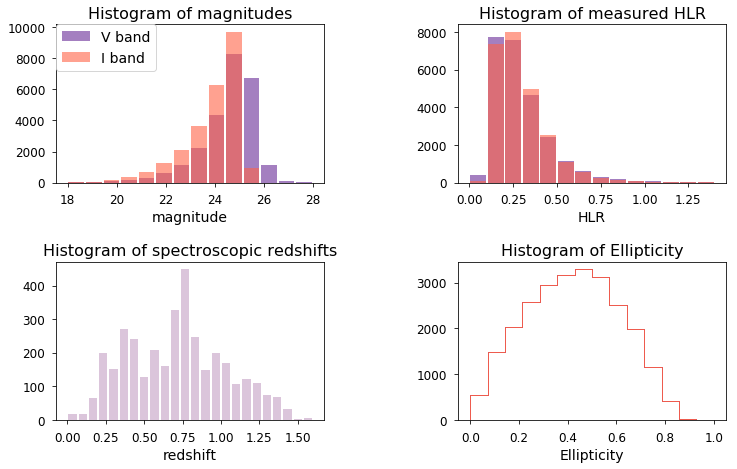

In [7]:
## Plot AEGIS galaxy properties 
plt.figure(1,figsize=[12,16])
plt.subplots_adjust(wspace = 0.5)
plt.subplots_adjust(hspace = 0.5)
plt.subplot(4,2,1)
plt.hist(aeg_cg_bias_cat['MAG_1'],np.linspace(18,28,15), alpha=0.5,histtype='bar',rwidth=0.9,
         color='indigo', label='V band')
plt.hist(aeg_cg_bias_cat['MAG_2'],np.linspace(18,28,15), alpha=0.6,histtype='bar',rwidth=0.9,
         color='tomato', label='I band')
plt.xlabel('magnitude')
plt.legend(loc=2)
plt.title('Histogram of magnitudes')

plt.subplot(4,2,2)
x = aeg_cg_bias_cat['FLUX_RADIUS_1']
y = aeg_cg_bias_cat['FLUX_RADIUS_2']
plt.hist(x*0.03, np.linspace(0,1.4,15),
         alpha=0.5, color='indigo', label='V band', histtype='bar',rwidth=0.9,)
plt.hist(y*0.03, np.linspace(0, 1.4,15),
         alpha=0.6, color='tomato', label='I band',histtype='bar',rwidth=0.9,)
plt.xlabel('HLR')
plt.title('Histogram of measured HLR')

plt.subplot(4,2,3)
plt.hist(aeg_cg_bias_cat['zphot_1'], np.linspace(0,1.6,25),
         alpha=0.9, color='thistle',histtype='bar',rwidth=0.8)
plt.xlabel('redshift')
plt.title('Histogram of spectroscopic redshifts')

plt.subplot(4,2,4)
plt.hist(aeg_cg_bias_cat['ELLIPTICITY_1'],  np.linspace(0,1,15),alpha=0.9,
         color='indigo', label='V band',histtype='step')
plt.hist(aeg_cg_bias_cat['ELLIPTICITY_2'],  np.linspace(0,1,15),alpha=0.9,
         color='tomato', label='I band',histtype='step')
plt.title('Histogram of Ellipticity')
plt.xlabel('Ellipticity')
plt.savefig(plot_path + "aegis_gal.png", 
             bbox_inches='tight')

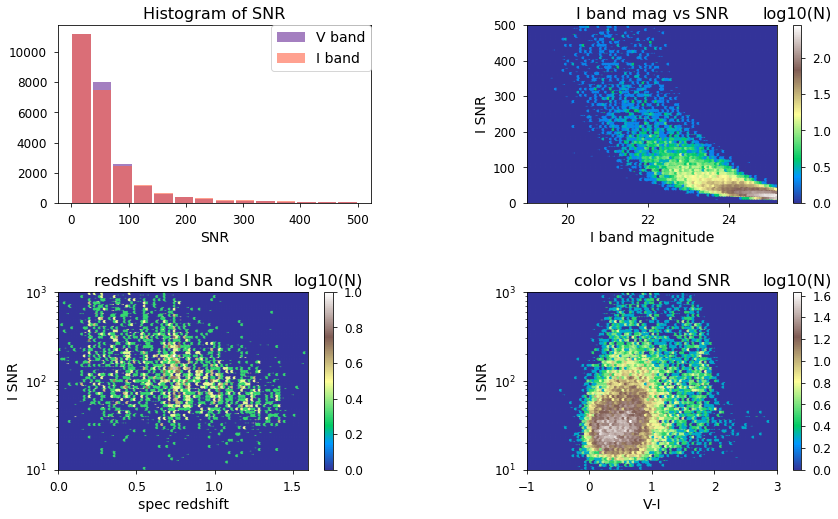

In [5]:
## Plot AEGIS noise properties 
plt.figure(1,figsize=[14,18])
plt.subplot(4,2,1)
plt.hist(aeg_cg_bias_cat['sn_ellip_gauss_1'],np.linspace(0,500,15), alpha=0.5,histtype='bar',rwidth=0.9,
         color='indigo', label='V band')
plt.hist(aeg_cg_bias_cat['sn_ellip_gauss_2'],np.linspace(0,500,15), alpha=0.6,histtype='bar',rwidth=0.9,
         color='tomato', label='I band')
plt.xlabel('SNR')
plt.legend(loc=1)
plt.title('Histogram of SNR')

plt.subplot(4,2,2)
x = aeg_cg_bias_cat['MAG_2']
y = aeg_cg_bias_cat['sn_ellip_gauss_2']
xmin, xmax = 19,25.2 #get_plt_rng(x)
ymin, ymax = 0,500 #get_plt_rng(y)
#plt.xticks(())
plt.hexbin(x,y, bins='log',
           extent=(xmin,xmax,ymin,ymax), cmap='terrain')
clb = plt.colorbar()
clb.ax.set_title('log10(N)')
plt.xlabel('I band magnitude')
plt.ylabel('I SNR')
plt.title('I band mag vs SNR')
plt.ylim([ymin, ymax])
plt.xlim([xmin, xmax])

plt.subplot(4,2,3)
q, = np.where((aeg_cg_bias_cat['sn_ellip_gauss_2']>0) & (aeg_cg_bias_cat['zphot_2']>0) )
x = aeg_cg_bias_cat['zphot_2'][q]
y = aeg_cg_bias_cat['sn_ellip_gauss_2'][q]
xmin, xmax = get_plt_rng(x)
ymin, ymax = get_plt_rng(y)
#plt.xticks(())
plt.hexbin(x,y, bins='log', yscale='log',
           extent=(0,1.6,1,3), cmap='terrain')
clb = plt.colorbar()
clb.ax.set_title('log10(N)')
plt.xlabel('spec redshift')
plt.ylabel('I SNR')
plt.title('redshift vs I band SNR')
plt.ylim([0,1000])
plt.xlim([0,1.6])


plt.subplot(4,2,4)
q, = np.where(aeg_cg_bias_cat['sn_ellip_gauss_2']>0)
x = aeg_cg_bias_cat['MAG_1'][q] - aeg_cg_bias_cat['MAG_2'][q]
y = aeg_cg_bias_cat['sn_ellip_gauss_2'][q]
xmin, xmax = get_plt_rng(x)
ymin, ymax = get_plt_rng(y)
#plt.xticks(())
plt.hexbin(x,y, bins='log', yscale='log',
           extent =(-1,3,1,3),cmap='terrain')
clb = plt.colorbar()
clb.ax.set_title('log10(N)')
plt.xlabel('V-I')
plt.ylabel('I SNR')
plt.title('color vs I band SNR')
plt.ylim([0,1000])
plt.xlim([-1,3])

plt.savefig(plot_path + "aegis_snr.png", 
            bbox_inches='tight')

m_CRG = -0.00365647885234 +- 0.00150889920452


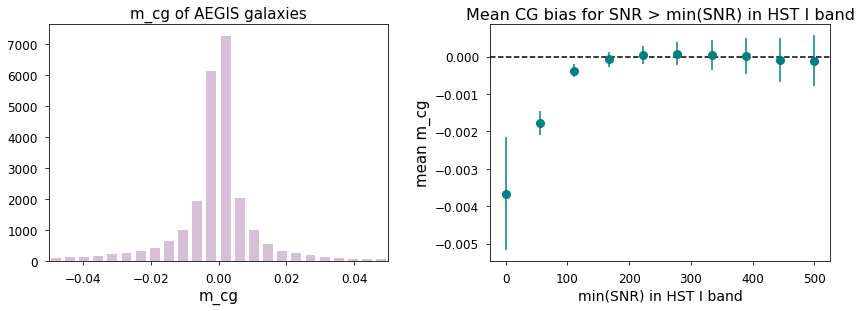

In [8]:
plt.figure(1,figsize=[14,10])
plt.subplots_adjust(wspace = 0.3)
plt.subplots_adjust(hspace = 0.3)
plt.subplot(2,2,1)
plt.hist(aeg_cg_bias_cat['m_CRG_1'].T[2], np.linspace(-0.05,0.05,25),
         color='thistle',histtype='bar',rwidth=0.7)
plt.xlim([-0.05,0.05])
plt.xlabel('m_cg',size=15)
plt.title('m_cg of AEGIS galaxies',size=15)

plt.subplot(2,2,2)
snrs = np.linspace(0, 500,10)
mean_m_CRG, mean_m_CRG_err = [],[]
diff1,diff2=[],[]
for s in snrs:
    q,= np.where(aeg_cg_bias_cat['sn_ellip_gauss_2']>s)
    c = aeg_cg_bias_cat['m_CRG_1'][q].T[2]
    mean_m_CRG.append(np.mean(c))
    mean_m_CRG_err.append(np.std(c)/len(q)**0.5)

plt.errorbar(snrs, mean_m_CRG, yerr=mean_m_CRG_err, marker='o',markersize=8,
             linestyle='', color='teal')
plt.axhline(0, linestyle='--', c='k')
plt.xlabel('min(SNR) in HST I band')
plt.ylabel('mean m_cg',size=15)
plt.title('Mean CG bias for SNR > min(SNR) in HST I band')
plt.savefig(plot_path + "aeg_mcg_results.png", 
             bbox_inches='tight')


mean = np.mean(aeg_cg_bias_cat['m_CRG_1'].T[2])
err = np.std(aeg_cg_bias_cat['m_CRG_1'].T[2])/len(aeg_cg_bias_cat['m_CRG_1'].T[2])**0.5
print "m_CRG = {0} +- {1}".format(mean, err)

m_CRG = -0.00365647885234 +- 0.00150889920452


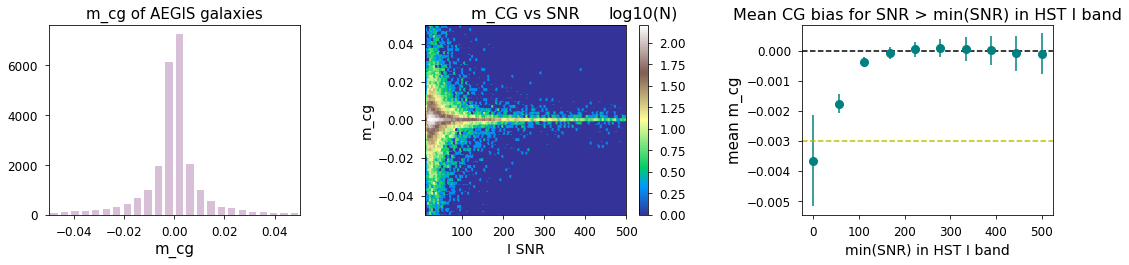

In [21]:
plt.figure(1,figsize=[18,14])
plt.subplot(3,3,1)
plt.hist(aeg_cg_bias_cat['m_CRG_1'].T[2], np.linspace(-0.05,0.05,25),
         color='thistle',histtype='bar',rwidth=0.7)
plt.xlim([-0.05,0.05])
plt.xlabel('m_cg',size=15)
plt.title('m_cg of AEGIS galaxies',size=15)


plt.subplot(3,3,2)
x = aeg_cg_bias_cat['sn_ellip_gauss_2']
y = aeg_cg_bias_cat['m_CRG_1'].T[2]
ymin, ymax = -0.05,0.05 #get_plt_rng(x)
xmin, xmax = 10,500 #get_plt_rng(y)
#plt.xticks(())
plt.hexbin(x,y, bins='log',
           extent=(xmin,xmax,ymin,ymax), cmap='terrain')
clb = plt.colorbar()
clb.ax.set_title('log10(N)')
plt.ylabel('m_cg')
plt.xlabel('I SNR')
plt.title('m_CG vs SNR')
plt.ylim([ymin, ymax])
plt.xlim([xmin, xmax])


plt.subplot(3,3,3)
snrs = np.linspace(0, 500,10)
mean_m_CRG, mean_m_CRG_err = [],[]
diff1,diff2=[],[]
for s in snrs:
    q,= np.where(aeg_cg_bias_cat['sn_ellip_gauss_2']>s)
    c = aeg_cg_bias_cat['m_CRG_1'][q].T[2]
    mean_m_CRG.append(np.mean(c))
    mean_m_CRG_err.append(np.std(c)/len(q)**0.5)

plt.errorbar(snrs, mean_m_CRG, yerr=mean_m_CRG_err, marker='o',markersize=8,
             linestyle='', color='teal')
plt.axhline(0, linestyle='--', c='k')
plt.xlabel('min(SNR) in HST I band')
plt.ylabel('mean m_cg',size=15)
plt.title('Mean CG bias for SNR > min(SNR) in HST I band')
plt.axhline(-0.003, linestyle='--', c='y')

plt.savefig(plot_path + "aeg_mcg_results.png", 
             bbox_inches='tight')


mean = np.mean(aeg_cg_bias_cat['m_CRG_1'].T[2])
err = np.std(aeg_cg_bias_cat['m_CRG_1'].T[2])/len(aeg_cg_bias_cat['m_CRG_1'].T[2])**0.5
print "m_CRG = {0} +- {1}".format(mean, err)

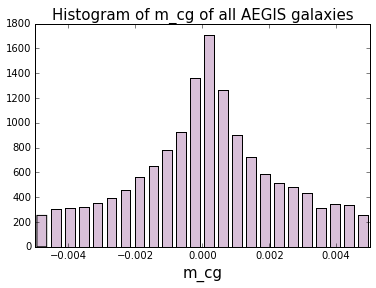

In [13]:
plt.hist(aeg_cg_bias_cat['m_CRG_1'].T[2], np.linspace(-0.005,0.005,25),
         color='thistle',histtype='bar',rwidth=0.7)
plt.xlim([-0.005,0.005])
plt.xlabel('m_cg',size=15)
plt.legend(loc=2)
plt.title('Histogram of m_cg of all AEGIS galaxies',size=15)

Results for galaxies with I band SNR>100


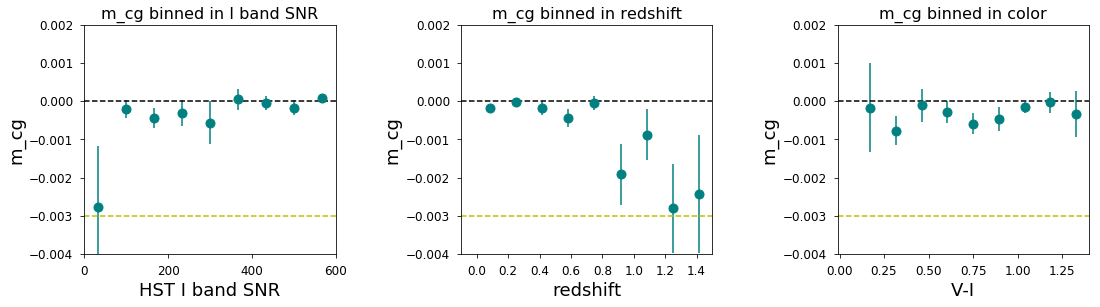

In [36]:

print "Results for galaxies with I band SNR>100"
q, = np.where(aeg_cg_bias_cat['sn_ellip_gauss_2']>100)
plt.figure(1,figsize=[18,16])
plt.subplots_adjust(hspace=0.4) 
plt.subplots_adjust(wspace = 0.5)

i=2
plt.subplot(3,3,1)
in_bins = np.linspace(0, 600,10)
d = np.digitize(aeg_cg_bias_cat['sn_ellip_gauss_1'][q], in_bins)
x = in_bins + (in_bins[1]-in_bins[0])/2.
y = [aeg_cg_bias_cat['m_CRG_1'][q].T[i][d == j].mean() for j in range(1,len(in_bins))]
ystd = np.array([aeg_cg_bias_cat['m_CRG_1'][q].T[i][d == j].std() for j in range(1, len(in_bins))])
num = np.array([len(aeg_cg_bias_cat['m_CRG_1'][q].T[i][d == j]) for j in range(1, len(in_bins))])
plt.errorbar(x[:-1],y,yerr=ystd/num**0.5,c='teal',
             marker='o', linestyle='',markersize=9)
plt.xlabel('HST I band SNR', size=18)
plt.ylabel('m_cg', size=18)
plt.axhline(0, linestyle='--', c='k')
plt.title('m_cg binned in I band SNR')
plt.xlim([-0.1,600])
plt.ylim([-0.004,0.002])
plt.locator_params(tight=True, nbins=6)
plt.axhline(-0.003, linestyle='--', c='y')
plt.axhline(0.003, linestyle='--', c='y')

plt.subplot(3,3,2)
in_bins = np.linspace(0, 1.5,10)
d = np.digitize(aeg_cg_bias_cat['zphot_1'][q], in_bins)
x = in_bins + (in_bins[1]-in_bins[0])/2.
y = [aeg_cg_bias_cat['m_CRG_1'][q].T[i][d == j].mean() for j in range(1,len(in_bins))]
ystd = np.array([aeg_cg_bias_cat['m_CRG_1'][q].T[i][d == j].std() for j in range(1, len(in_bins))])
num = np.array([len(aeg_cg_bias_cat['m_CRG_1'][q].T[i][d == j]) for j in range(1, len(in_bins))])
plt.errorbar(x[:-1],y,yerr=ystd/num**0.5,c='teal',
             marker='o', linestyle='',markersize=9)
plt.xlabel('redshift', size=18)
plt.ylabel('m_cg', size=18)
plt.axhline(0, linestyle='--', c='k')
plt.title('m_cg binned in redshift')
plt.xlim([-0.1,1.5])
plt.ylim([-0.004,0.002])
plt.locator_params(axis='y',tight=True, nbins=6)
plt.locator_params(axis='x',tight=True, nbins=8)
plt.axhline(-0.003, linestyle='--', c='y')
plt.axhline(0.003, linestyle='--', c='y')

plt.subplot(3,3,3)
in_bins = np.linspace(0.1, 1.4,10)
x_in = aeg_cg_bias_cat['MAG_1'][q]- aeg_cg_bias_cat['MAG_2'][q]
d = np.digitize(x_in, in_bins)
x = in_bins + (in_bins[1]-in_bins[0])/2.
y = [aeg_cg_bias_cat['m_CRG_1'][q].T[i][d == j].mean() for j in range(1,len(in_bins))]
ystd = np.array([aeg_cg_bias_cat['m_CRG_1'][q].T[i][d == j].std() for j in range(1, len(in_bins))])
num = np.array([len(aeg_cg_bias_cat['m_CRG_1'][q].T[i][d == j]) for j in range(1, len(in_bins))])
plt.errorbar(x[:-1],y,yerr=ystd/num**0.5,c='teal',
             marker='o', linestyle='',markersize=9)
plt.axhline(0, linestyle='--', c='k')
plt.xlabel('V-I', size=18)
plt.ylabel('m_cg', size=18)
plt.title('m_cg binned in color')
plt.ylim([-0.004,0.002])
plt.xlim([-0.01,1.4])
plt.locator_params(axis='y',tight=True, nbins=6)
plt.locator_params(axis='x',tight=True, nbins=7)
plt.axhline(-0.003, linestyle='--', c='y')
plt.axhline(0.003, linestyle='--', c='y')

plt.savefig(plot_path + "aeg_mcg_bin.png", 
            bbox_inches='tight')

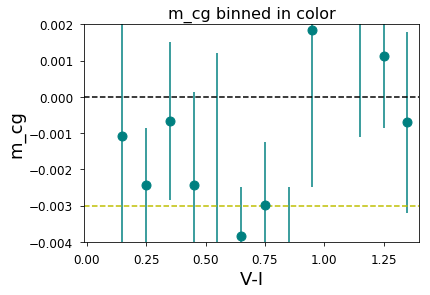

In [35]:
in_bins = np.linspace(0.1, 2,20)
x_in = aeg_cg_bias_cat['MAG_1'][q]- aeg_cg_bias_cat['MAG_2'][q]
d = np.digitize(x_in, in_bins)
x = in_bins + (in_bins[1]-in_bins[0])/2.
y = [aeg_cg_bias_cat['m_CRG_1'][q].T[i][d == j].mean() for j in range(1,len(in_bins))]
ystd = np.array([aeg_cg_bias_cat['m_CRG_1'][q].T[i][d == j].std() for j in range(1, len(in_bins))])
num = np.array([len(aeg_cg_bias_cat['m_CRG_1'][q].T[i][d == j]) for j in range(1, len(in_bins))])
plt.errorbar(x[:-1],y,yerr=ystd/num**0.5,c='teal',
             marker='o', linestyle='',markersize=9)
plt.axhline(0, linestyle='--', c='k')
plt.xlabel('V-I', size=18)
plt.ylabel('m_cg', size=18)
plt.title('m_cg binned in color')
plt.ylim([-0.004,0.002])
plt.xlim([-0.01,1.4])
plt.locator_params(axis='y',tight=True, nbins=6)
plt.locator_params(axis='x',tight=True, nbins=7)
plt.axhline(-0.003, linestyle='--', c='y')
plt.axhline(0.003, linestyle='--', c='y')

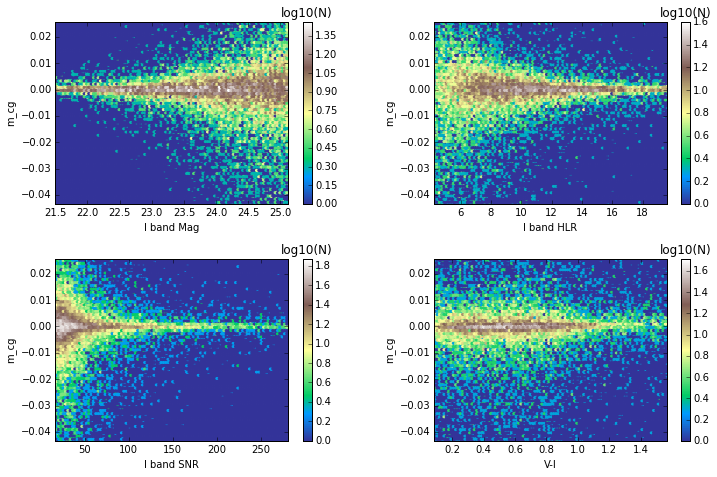

In [22]:

plt.figure(1,figsize=[12,16])
plt.subplots_adjust(wspace = 0.3)
plt.subplots_adjust(hspace = 0.3)
plt.subplot(4,2,1)
x = aeg_cg_bias_cat['MAG_2']
y = aeg_cg_bias_cat['m_CRG_1'].T[2]
xmin, xmax = get_plt_rng(x)
ymin, ymax = get_plt_rng(y)
plt.hexbin(x,y ,bins='log',
           extent=(xmin,xmax,ymin,ymax), cmap='terrain')
clb = plt.colorbar()
clb.ax.set_title('log10(N)')
plt.xlabel('I band Mag')
plt.ylabel('m_cg')
#plt.title('Bulge vs Disk HLR')

plt.subplot(4,2,2)
x = aeg_cg_bias_cat['FLUX_RADIUS_2']
y = aeg_cg_bias_cat['m_CRG_1'].T[2]
xmin, xmax = get_plt_rng(x)
ymin, ymax = get_plt_rng(y)
plt.hexbin(x,y ,bins='log',
           extent=(xmin,xmax,ymin,ymax), cmap='terrain')
clb = plt.colorbar()
clb.ax.set_title('log10(N)')
plt.xlabel('I band HLR')
plt.ylabel('m_cg')
#plt.title('Bulge vs Disk HLR')

plt.subplot(4,2,3)
x = aeg_cg_bias_cat['sn_ellip_gauss_2']
y = aeg_cg_bias_cat['m_CRG_1'].T[2]
xmin, xmax = get_plt_rng(x)
ymin, ymax = get_plt_rng(y)
plt.hexbin(x,y ,bins='log',
           extent=(xmin,xmax,ymin,ymax), cmap='terrain')
clb = plt.colorbar()
clb.ax.set_title('log10(N)')
plt.xlabel('I band SNR')
plt.ylabel('m_cg')

plt.subplot(4,2,4)
x = aeg_cg_bias_cat['MAG_1']-aeg_cg_bias_cat['MAG_2']
y = aeg_cg_bias_cat['m_CRG_1'].T[2]
xmin, xmax = get_plt_rng(x)
ymin, ymax = get_plt_rng(y)
#xmin=0
plt.hexbin(x,y ,bins='log',
           extent=(xmin,xmax,ymin,ymax), cmap='terrain')
clb = plt.colorbar()
clb.ax.set_title('log10(N)')
plt.xlabel('V-I')
plt.ylabel('m_cg')

## I band results

In [30]:
from astropy.table import join, Column

In [31]:
i_cat = Table.read('/nfs/slac/g/ki/ki19/deuce/AEGIS/cg_results/final_AEGIS_cg_bias_i_band.fits', format='fits')
r_cat = Table.read('/nfs/slac/g/ki/ki19/deuce/AEGIS/cg_results/final_AEGIS_cg_bias_only2.fits', format='fits')
comb_cat = join(r_cat,i_cat, keys='IDENT_1',join_type='inner')

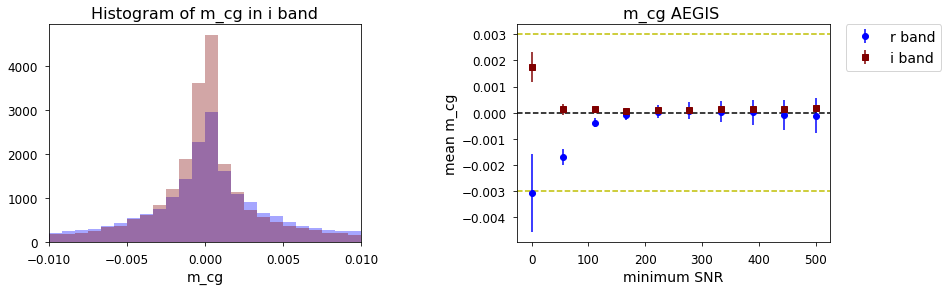

In [32]:
snrs = np.linspace(0, 500,10)
plt.figure(1,figsize=[14,10])
plt.subplot(2,2,1)
plt.hist(comb_cat['m_CRG_1'].T[2], np.linspace(-0.01,0.01,25), alpha=0.35,
         color='blue', label='r band')
plt.hist(comb_cat['m_CRG_1_i'].T[2],np.linspace(-0.01,0.01,25), alpha=0.35,
         color='maroon', label='i band')
plt.xlim([-0.01,0.01])
plt.xlabel('m_cg')
plt.title('Histogram of m_cg in i band')
plt.locator_params(tight=True, nbins=6, axis='x')


plt.subplot(2,2,2)
mean_m_CRG_i, mean_m_CRG_r = [],[]
mean_m_CRG_err_i, mean_m_CRG_err_r = [],[]
for s in snrs:
    q,= np.where(comb_cat['sn_ellip_gauss_2']>s)
    c1 = comb_cat['m_CRG_1'][q].T[2]
    c2 = comb_cat['m_CRG_1_i'][q].T[2]
    mean_m_CRG_r.append(np.mean(c1))
    mean_m_CRG_i.append(np.mean(c2))
    mean_m_CRG_err_r.append(np.std(c1)/len(q)**0.5)
    mean_m_CRG_err_i.append(np.std(c2)/len(q)**0.5)

plt.axhline(0, linestyle='--', c='k')    
plt.errorbar(snrs, mean_m_CRG_r, yerr=mean_m_CRG_err_r, marker='o',linestyle='',
             c='blue', label='r band')
plt.errorbar(snrs, mean_m_CRG_i, yerr=mean_m_CRG_err_i, marker='s',linestyle='',
             c='maroon', label='i band')
plt.axhline(-0.003, linestyle='--', c='y')
plt.axhline(0.003, linestyle='--', c='y')
plt.xlabel('minimum SNR')
plt.ylabel('mean m_cg')
plt.legend(bbox_to_anchor=(1.05,1), loc=2)
plt.title('m_cg AEGIS ')

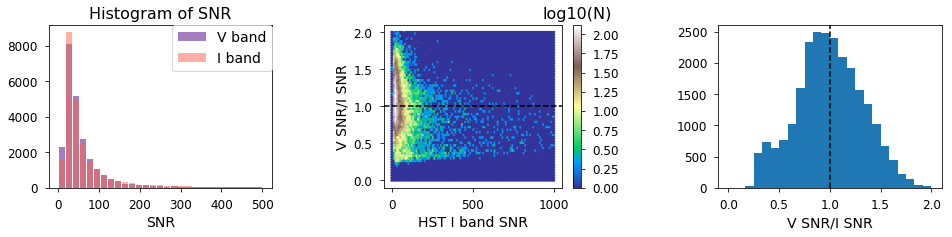

In [33]:
plt.figure(1,figsize=[16,12])
plt.subplot(3,3,1)
plt.hist(comb_cat['sn_ellip_gauss_1'],np.linspace(0,500,30), alpha=0.5,histtype='bar',rwidth=0.9,
         color='indigo', label='V band')
plt.hist(comb_cat['sn_ellip_gauss_2'],np.linspace(0,500,30), alpha=0.5,histtype='bar',rwidth=0.9,
         color='tomato', label='I band')
plt.xlabel('SNR')
plt.legend(loc=1)
plt.title('Histogram of SNR')
plt.subplot(3,3,2)
xmin, xmax=0,1000
ymin,ymax=0,2
q,= np.where((comb_cat['sn_ellip_gauss_1']>0) & (comb_cat['sn_ellip_gauss_2']>0))
plt.hexbin(comb_cat['sn_ellip_gauss_2'][q],comb_cat['sn_ellip_gauss_1'][q]/comb_cat['sn_ellip_gauss_2'][q],
           bins='log',extent=(xmin,xmax,ymin,ymax), cmap='terrain' )
clb = plt.colorbar()
clb.ax.set_title('log10(N)')
plt.axhline(1, c='k', linestyle='--')
plt.xlabel('HST I band SNR')
plt.ylabel('V SNR/I SNR')
plt.subplot(3,3,3)
plt.hist(comb_cat['sn_ellip_gauss_1'][q]/comb_cat['sn_ellip_gauss_2'][q], np.linspace(0,2,25))
plt.axvline(1, c='k', linestyle='--')
plt.xlabel('V SNR/I SNR')

#### Additional Code used to combine different batch job results

#### Correcting for correlated noise
aeg_cg_bias_cat['sn_ellip_gauss_1'] = aeg_cg_bias_cat['sn_ellip_gauss_1'] *(0.316)**0.5
aeg_cg_bias_cat['sn_ellip_gauss_2'] = aeg_cg_bias_cat['sn_ellip_gauss_2'] *(0.316)**0.5

aeg_cg_bias_cat.write('/nfs/slac/g/ki/ki19/deuce/AEGIS/cg_results/final_AEGIS_cg_bias_only2.fits', format='fits', overwrite=True)

#Correlated noise fudgfactor: ratio of variance=0.316 has been added to the HST noise




#### Code to merge and save results from different files to a single file

def get_bias3(gcg,gnocg, gtrue):
    fit_cg = np.polyfit(gtrue, gcg,1)

    fit_nocg= np.polyfit(gtrue, gnocg,1)

    fit_fin= np.polyfit(gtrue, gcg-gnocg,1)

    m = [fit_cg[0]-1, fit_nocg[0]-1,fit_fin[0]]
    c = [fit_cg[1], fit_nocg[1], fit_fin[1]]
    return m,c


num = 266 # 8000# 200
cat_CRG= Table()
for i  in range(num):
    count=0
    path = '/nfs/slac/g/ki/ki19/deuce/AEGIS/data_test_CRG/results/cg_test/full/'
    fname = path + 'CRG_AEGIS/AEGIS_cg_CRG_{0}_i_band.fits'.format(i)
    if os.path.isfile(fname) is True:
        temp = Table.read(fname,format='fits')
        cat_CRG = vstack([cat_CRG,temp])
        count+=1


cat_CRG.keep_columns(['IDENT_1', 'CRG_g_cg', 'CRG_g_no_cg' ])

k=0
gtrue = np.mean(r_cat['rt_g'].T[k], axis=1)
####### remove failures
bad=np.array([])
for g in range(len(gtrue)):
    q,=np.where((cat_CRG['CRG_g_cg'].T[k][g]== -10) | (cat_CRG['CRG_g_cg'].T[k][g]== -1))
    r,=np.where((cat_CRG['CRG_g_no_cg'].T[k][g]== -10) | (cat_CRG['CRG_g_no_cg'].T[k][g]== -10))
    s,=np.where(cat_CRG['CRG_g_cg'].T[k][g]== -1)
    t,=np.where(cat_CRG['CRG_g_no_cg'].T[k][g]== -1)
    bad = np.hstack([bad,r,q,s,t])
full = np.array(range(len(cat_CRG)))    
good=np.delete(full,np.unique(bad))
good_cat=cat_CRG[good]
col = Column(np.zeros([len(good), 3]), name='m_CRG_1_i',
                 shape=(3, ), dtype='f8')
good_cat.add_column(col)
col = Column(np.zeros([len(good), 3]), name='m_CRG_2_i',
                 shape=(3, ), dtype='f8')
good_cat.add_column(col)
col = Column(np.zeros([len(good), 3]), name='c_CRG_1_i',
                 shape=(3, ), dtype='f8')
good_cat.add_column(col)
col = Column(np.zeros([len(good), 3]), name='c_CRG_2_i',
                 shape=(3, ), dtype='f8')
good_cat.add_column(col)
#m_CRG, c_CRG=np.zeros([len(good),3]),np.zeros([len(good),3])
for i, indx in enumerate(good):
    k=0
    gcg = cat_CRG['CRG_g_cg'][indx].T[k]
    gnocg = cat_CRG['CRG_g_no_cg'][indx].T[k]
    m, c = get_bias3(gcg, gnocg,gtrue)
    good_cat['m_CRG_1_i'][i]=m
    good_cat['c_CRG_1_i'][i]=c
    k=1
    gcg = cat_CRG['CRG_g_cg'][indx].T[k]
    gnocg = cat_CRG['CRG_g_no_cg'][indx].T[k]
    m, c = get_bias3(gcg, gnocg,gtrue)
    good_cat['m_CRG_2_i'][i]=m
    good_cat['c_CRG_2_i'][i]=c
print "Number of galaxies with shape measurements %i out of %i"%(len(good_cat), len(cat_CRG))

good_cat.rename_column('CRG_g_cg','CRG_g_cg_i')
good_cat.rename_column('CRG_g_no_cg','CRG_g_no_cg_i')
good_cat.write('/nfs/slac/g/ki/ki19/deuce/AEGIS/cg_results/final_AEGIS_cg_bias_i_band.fits', format='fits', overwrite=True)